In [1]:
import pandas as pd
from scripts.sentiment_analysis import *
from scipy import stats
from collections import defaultdict

In [2]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
adapted_movies_df = adapted_movies_df.dropna(subset=['MovieBoxOffice', 'MoviePlot']).reset_index(drop=True)
adapted_movies_df

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,3333,The Birth of a Nation,1915,50000000.0,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...","Thomas Dixon, Jr.",The Clansman: A Historical Romance of the Ku K...,1905.0,1905,NaN,NaN,NaN,NaN,6.1,26959,The film follows two juxtaposed families: the...
1,21135479,Little Lord Fauntleroy,1921,900000.0,112.0,"Silent film, English Language",United States of America,"Silent film, Drama, Comedy, Black-and-white, F...",Frances Hodgson Burnett,Little Lord Fauntleroy,1885.0,1886,Illustrated. Frances Hodgson Burnett's charact...,3.85,18137.0,NaN,6.8,384,Cedric Errol is a poor American boy who finds ...
2,73930,Greed,1924,274827.0,246.0,"Silent film, English Language",United States of America,"Silent film, Drama, Black-and-white",Frank Norris,McTeague,1899.0,1899,NaN,3.68,5410.0,eng,8.0,11078,{{quote box}} Trina & McTeague The film opens ...
3,308930,The Phantom of the Opera,1925,2000000.0,106.0,"Silent film, English Language, American English","United States of America, England","Horror, Silent film, Drama",Gaston Leroux,The Phantom of the Opera,1909.0,1910,NaN,3.97,189814.0,NaN,7.5,20708,:The scenario presented is based on the genera...
4,31667694,Beau Ideal,1931,575000.0,NaN,NaN,United States of America,"Romance Film, Adventure, War film",P. C. Wren,Beau Geste,1924.0,1924,Three noble English brothers battle a sadistic...,4.01,3047.0,NaN,4.9,251,"The hero, John Geste, joins the French Foreign..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,27504596,White Night,2009,6171057.0,135.0,Korean Language,South Korea,"Thriller, Mystery, Romance Film",Keigo Higashino,Journey Under the Midnight Sun,1999.0,1999,NaN,NaN,NaN,NaN,6.5,1475,"Kim Si-hoo, a pawnbroker is found murdered in ..."
998,30470501,Into The White Night,2010,4593914.0,149.0,Japanese Language,Japan,"Drama, Japanese Movies, World cinema",Keigo Higashino,Journey Under the Midnight Sun,1999.0,1999,NaN,NaN,NaN,NaN,6.5,518,"A pawn shop owner in Osaka is murdered, but du..."
999,32621340,The Client,2011,15780280.0,122.0,Korean Language,South Korea,"Crime Fiction, Mystery, Thriller, Drama",John Grisham,The Client,1993.0,1993,NaN,4.01,378641.0,eng,6.8,2040,"On his wedding anniversary, Han Chul-min driv..."
1000,35020822,Helpless,2012,16175929.0,117.0,Korean Language,South Korea,"Thriller, Mystery",Miyuki Miyabe,All She Was Worth,1992.0,1992,Here is a deftly written thriller that is also...,3.69,2921.0,NaN,6.7,2662,"South Korea, 2009. A few days before their wed..."


### sentiment analysis

In [ ]:
algorithms = [vader_sentiment_analysis, textblob_sentiment_analysis, BERT_sentiment_analysis]
sentiments_adapted = sentiment_analysis(adapted_movies_df, algorithms)
sentiments_adapted.to_csv('adapted_movies_sentiments.csv', index=False)
sentiments_adapted

In [ ]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
adapted_movies_df = adapted_movies_df.dropna(subset=['BookDescription']).reset_index(drop=True)

algorithms = [vader_sentiment_analysis, textblob_sentiment_analysis, BERT_sentiment_analysis]
sentiment_book = sentiment_analysis(adapted_movies_df, algorithms, 'BookDescription')
sentiment_book.to_csv('adapted_books_sentiments.csv', index=False)
sentiment_book

### correlation between book and movie plot

In [3]:
movie_sentiments = pd.read_csv('adapted_movies_sentiments.csv')
book_sentiments = pd.read_csv('adapted_books_sentiments.csv')

In [4]:
sentiments = movie_sentiments.merge(book_sentiments, on='wikipedia_id', how='inner', suffixes=('_movie', '_book'))

In [5]:
correlations = defaultdict(float)
metrics = [ 'compound', 'neg', 'neu', 'pos', 'polarity', 'subjectivity' , 'sadness', 'joy', 'love', 'anger', 'surprise', 'fear' ]
for metric in metrics:
    pearson_corr, pearson_pval = stats.pearsonr(sentiments[metric + "_book"],sentiments[metric + "_movie"])
    spearman_corr, spearman_pval = stats.spearmanr(sentiments[metric + "_book"],sentiments[metric + "_movie"])
    correlations[metric] = { 'pearson_correlation': pearson_corr,
                            'pearson_pval': pearson_pval,
                            'spearman_correlation': spearman_corr,
                            'spearman_pval': spearman_pval}
correlations = pd.DataFrame(correlations).T


In [6]:
html_table = correlations.to_html(classes="table table-striped", index=True)

with open("table.html", "w") as file:
    file.write(html_table)

correlations

,pearson_correlation,pearson_pval,spearman_correlation,spearman_pval
compound,0.258787,4.131332e-05,0.298513,1.960190e-06
neg,0.326173,1.762005e-07,0.317920,3.709767e-07
neu,0.188660,3.031111e-03,0.205208,1.237747e-03
pos,0.250243,7.492433e-05,0.243133,1.210390e-04
polarity,0.067432,2.931340e-01,0.111599,8.127898e-02
subjectivity,0.042274,5.101544e-01,0.049393,4.415108e-01
sadness,0.119381,6.207860e-02,0.146411,2.188576e-02
joy,0.139826,2.865599e-02,0.147467,2.094027e-02
love,0.027217,6.716239e-01,0.054519,3.955322e-01
anger,0.157965,1.330646e-02,0.149057,1.958333e-02


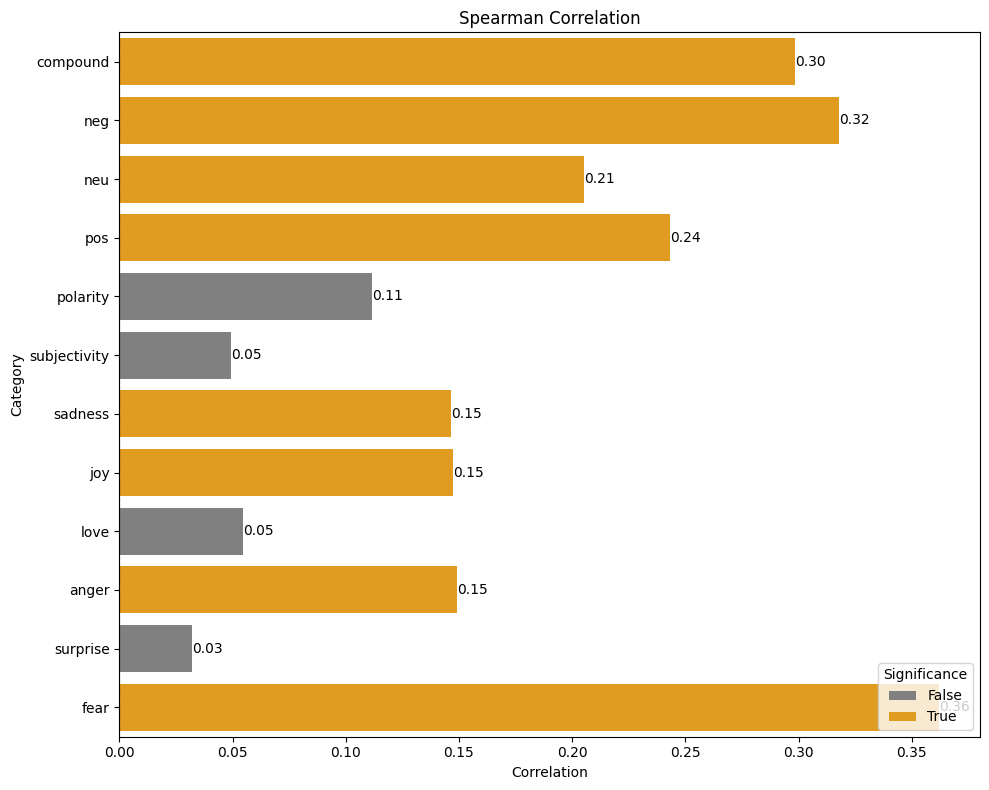

<Figure size 640x480 with 0 Axes>

In [8]:
df = pd.DataFrame()
df['Significant'] = correlations['spearman_pval'] < 0.05
df['Category'] = correlations.index
df['Correlation'] = correlations['spearman_correlation']

plot_correlation(df)